<a href="https://colab.research.google.com/github/brhie/ML-Algorithims-from-Scratch/blob/main/Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 28 * 28) / 255
print(X_train_reshaped.shape, y_train.shape)

(60000, 784) (60000,)


In [3]:
def init_params(input_shape, layer1_n, layer2_n):
  # Used Xavier init
  W1_num = np.sqrt(6 / (layer1_n + layer2_n))
  W1 = np.random.uniform(low=-W1_num, high=W1_num, size=(input_shape, layer1_n))
  W2_num = np.sqrt(6 / (layer1_n + layer2_n))
  W2 = np.random.uniform(low=-W2_num, high=W2_num, size=(layer1_n, layer2_n))
  b1 = np.zeros(shape=(1, layer1_n))
  b2 = np.zeros(shape=(1, layer2_n))
  return W1, b1, W2, b2

def relu(Z):
  return np.maximum(0, Z)

def softmax(X):
  logit = np.exp(X - np.amax(X, axis=1, keepdims=True)) # for numerical stability
  return logit / np.sum(logit, axis=1, keepdims=True)


def forward_prop(W1, b1, W2, b2, X):
  Z1 = X @ W1 + b1 # (m, H)
  A1 = relu(Z1) # (m, H)
  Z2 = A1 @ W2 + b2 # (m, C)
  A2 = softmax(Z2) # (m, C)
  return A2, Z2, A1, Z1

def one_hot(Y):
  num_categories = np.max(Y) + 1
  one_hot_encoded = np.zeros((Y.shape[0], num_categories), dtype=int)
  one_hot_encoded[np.arange(Y.shape[0]), Y] = 1
  return one_hot_encoded


def backward_prop(W1, W2, b1, b2, Z1, A1, Z2, A2, X, Y):
  m = Y.shape[0]
  one_hot_Y = one_hot(Y)
  d_A2 = (1/m) * (A2 - one_hot_Y) # (m, C)
  d_W2 = A1.T @ d_A2 # (H, m) X (m, C) -> (H, C)
  d_b2 = np.sum(d_A2, axis=0, keepdims=True) # (1, C)

  d_A1 = d_A2 @ W2.T  # (m, C) x (C, H) -> (m, H)
  d_Z1 = d_A1 * (Z1 > 0) # (m, H)

  d_W1 = X.T @ d_Z1 #  (input_dim, m) X (m, H) -> (input_dim, H)
  d_b1 = np.sum(d_Z1, axis=0, keepdims=True) # (1, H) # Added keepdims for b1 gradient
  return d_W1, d_b1, d_W2, d_b2


def update_params(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha):
  W1 = W1 - alpha * d_W1
  b1 = b1 - alpha * d_b1
  W2 = W2 - alpha * d_W2
  b2 = b2 - alpha * d_b2
  return W1, b1, W2, b2

def get_predictions(A2):
  return np.argmax(A2, axis=1)

def accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.shape[0]

def cost(A2, Y):
  one_hot_Y = one_hot(Y)
  return np.mean(np.sum(one_hot_Y * -np.log(A2), axis=1))

def gradient_descent(X, Y, alpha=0.01, epochs=100):
  W1, b1, W2, b2 = init_params(784, 10, 10)
  for i in range(epochs):
    A2, Z2, A1, Z1 = forward_prop(W1, b1, W2, b2, X)
    d_W1, d_b1, d_W2, d_b2 = backward_prop(W1, W2, b1, b2, Z1, A1, Z2, A2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, d_W1, d_b1, d_W2, d_b2, alpha)
    if i % 10 == 0:
        print("Iteration: ", i)
        predictions = get_predictions(A2)
        print("Accuracy: ", accuracy(predictions, Y), "Cost: ", cost(A2, Y))

  return W1, b1, W2, b2

In [4]:
W1, b1, W2, b2 = gradient_descent(X_train_reshaped, y_train, alpha=0.10, epochs=500)
prob_preds, _, _, _ = forward_prop(W1, b1, W2, b2, X_train_reshaped)
predictions = get_predictions(prob_preds)

Iteration:  0
[2 2 3 ... 2 2 1] [5 0 4 ... 5 6 8]
Accuracy:  0.08716666666666667 Cost:  3.3423373319997935
Iteration:  10
[6 0 3 ... 8 2 1] [5 0 4 ... 5 6 8]
Accuracy:  0.19483333333333333 Cost:  2.262539778271329
Iteration:  20
[2 0 3 ... 1 5 1] [5 0 4 ... 5 6 8]
Accuracy:  0.30138333333333334 Cost:  2.000855127423235
Iteration:  30
[3 0 3 ... 1 5 2] [5 0 4 ... 5 6 8]
Accuracy:  0.3783166666666667 Cost:  1.8284341664957697
Iteration:  40
[3 0 3 ... 8 5 2] [5 0 4 ... 5 6 8]
Accuracy:  0.43585 Cost:  1.6828638945596546
Iteration:  50
[3 0 3 ... 8 5 2] [5 0 4 ... 5 6 8]
Accuracy:  0.48765 Cost:  1.5462755977702616
Iteration:  60
[3 0 3 ... 8 3 2] [5 0 4 ... 5 6 8]
Accuracy:  0.5405666666666666 Cost:  1.4154815923070152
Iteration:  70
[5 0 3 ... 8 3 2] [5 0 4 ... 5 6 8]
Accuracy:  0.5832 Cost:  1.294563899281498
Iteration:  80
[5 0 3 ... 8 3 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6197166666666667 Cost:  1.1880175283661483
Iteration:  90
[5 0 3 ... 5 5 8] [5 0 4 ... 5 6 8]
Accuracy:  0.64985 Co

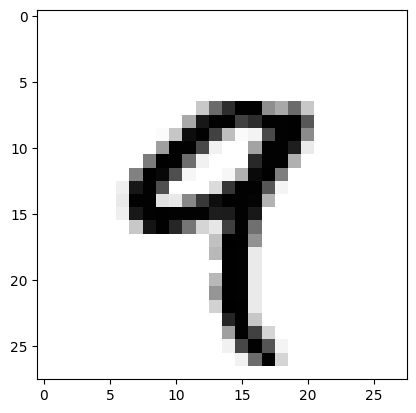

Predicted Value: 9


In [5]:
def show_image(array):
  plt.imshow(array.reshape(28, 28), cmap="binary")

i = 4

show_image(X_train_reshaped[i])
plt.show()
print(f"Predicted Value: {predictions[i]}")